In [1]:
import pandas as pd
import requests
import os
from dotenv import load_dotenv
import json
import matplotlib.pyplot as plt
import re
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Ciencia-de-Dados-IMT-2023/Datasets/main/df_musics.csv')
df.head()
#

,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms,album_name,playlist_name,playlist_id
0,0,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,Throwbacks,0
1,1,Britney Spears,spotify:track:6I9VzXrHxO9rA9A5euc8Ak,spotify:artist:26dSoYclwsYLMAKD3tpOr4,Toxic,spotify:album:0z7pVBGOD7HCIB7S8eLkLI,198800,In The Zone,Throwbacks,0
2,2,Beyoncé,spotify:track:0WqIKmW4BTrj3eJFmnCKMv,spotify:artist:6vWDO969PvNqNYHIOW5v0m,Crazy In Love,spotify:album:25hVFAxTlDvXbx2X2QkUkE,235933,Dangerously In Love (Alben für die Ewigkeit),Throwbacks,0
3,3,Justin Timberlake,spotify:track:1AWQoqb9bSvzTjaLralEkT,spotify:artist:31TPClRtHm23RisEBtV3X7,Rock Your Body,spotify:album:6QPkyl04rXwTGlGlcYaRoW,267266,Justified,Throwbacks,0
4,4,Shaggy,spotify:track:1lzr43nnXAijIGYnCT8M8H,spotify:artist:5EvFsr3kj42KNv97ZEnqij,It Wasn't Me,spotify:album:6NmFmPX56pcLBOFMhIiKvF,227600,Hot Shot,Throwbacks,0


In [3]:
# Percorrer cada coluna do DataFrame
for coluna in df.columns:
    # Aplicar a substituição de caracteres especiais em cada valor da coluna
    df[coluna] = df[coluna].apply(lambda x: re.sub(r'[^\w\s]', '', str(x)))

# Exibir o DataFrame atualizado
df['duration_ms'] = df['duration_ms'].astype(int)
print(df)

      pos        artist_name                           track_uri   
0       0      Missy Elliott  spotifytrack0UaMYEvWZi0ZqiDOoHU3YI  \
1       1     Britney Spears  spotifytrack6I9VzXrHxO9rA9A5euc8Ak   
2       2            Beyoncé  spotifytrack0WqIKmW4BTrj3eJFmnCKMv   
3       3  Justin Timberlake  spotifytrack1AWQoqb9bSvzTjaLralEkT   
4       4             Shaggy  spotifytrack1lzr43nnXAijIGYnCT8M8H   
...    ..                ...                                 ...   
67498  39       James Arthur  spotifytrack5uCax9HTNlzGybIStD3vDh   
67499  40          Big Words  spotifytrack0P1oO2gREMYUCoOkzYAyFu   
67500  41       Allan Rayman  spotifytrack2oM4BuruDnEvk59IvIXCwn   
67501  42          Jon Jason  spotifytrack4Ri5TTUgjM96tbQZd5Ua7V   
67502  43           Grizfolk  spotifytrack5RVuBrXVLptAEbGJdSDzL5   

                                artist_uri   
0      spotifyartist2wIVse2owClT7go1WT98tk  \
1      spotifyartist26dSoYclwsYLMAKD3tpOr4   
2      spotifyartist6vWDO969PvNqNYHIOW5v0m   

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12724\272937868.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(top_10_counts))


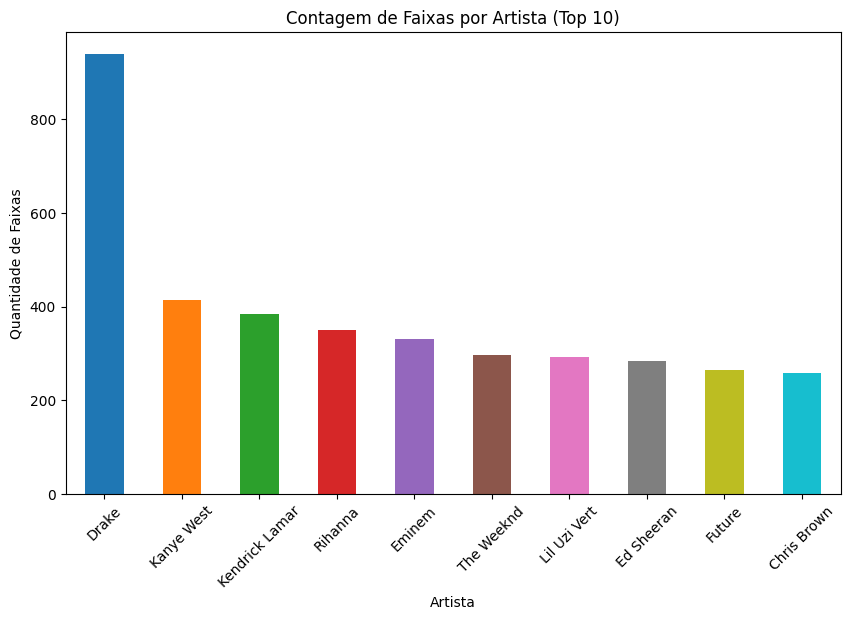

In [4]:

# Contar a quantidade de faixas por artista
counts = df['artist_name'].value_counts()

# Selecionar apenas os 10 primeiros artistas com maior quantidade de faixas
top_10_counts = counts.head(10)

# Gerar uma paleta de cores para as barras
colors = plt.cm.get_cmap('tab10', len(top_10_counts))

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
top_10_counts.plot(kind='bar', color=colors(range(len(top_10_counts))))
plt.xlabel('Artista')
plt.ylabel('Quantidade de Faixas')
plt.title('Contagem de Faixas por Artista (Top 10)')
plt.xticks(rotation=45)
plt.show()




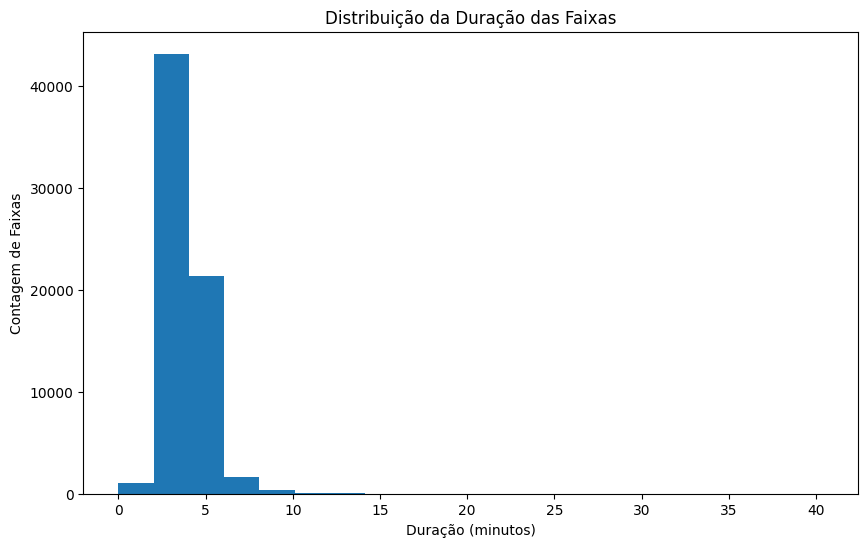

In [5]:
df['duration_ms'] = df['duration_ms'].astype(int)

# Converter a duração das faixas de milissegundos para minutos
df['duration_min'] = df['duration_ms'] / 60000

# Plotar o histograma da duração das faixas em minutos
plt.figure(figsize=(10, 6))
plt.hist(df['duration_min'], bins=20)
plt.xlabel('Duração (minutos)')
plt.ylabel('Contagem de Faixas')
plt.title('Distribuição da Duração das Faixas')
plt.show()

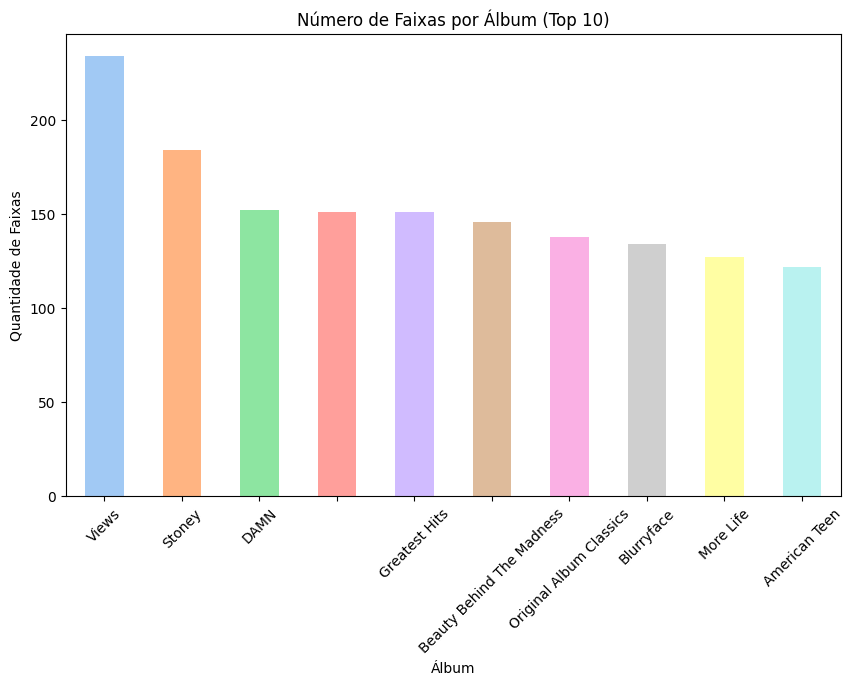

In [6]:
# Contar a quantidade de faixas por álbum
album_counts = df['album_name'].value_counts()

# Selecionar apenas os 10 primeiros álbuns com mais faixas
top_10_albums = album_counts.head(10)

# Paleta de cores para testar seaborn
colors = sns.color_palette('pastel', len(top_10_albums))

# Plotar o gráfico de barras com as cores em degradê de azul
plt.figure(figsize=(10, 6))
top_10_albums.plot(kind='bar', color=colors)
plt.xlabel('Álbum')
plt.ylabel('Quantidade de Faixas')
plt.title('Número de Faixas por Álbum (Top 10)')
plt.xticks(rotation=45)
plt.show()


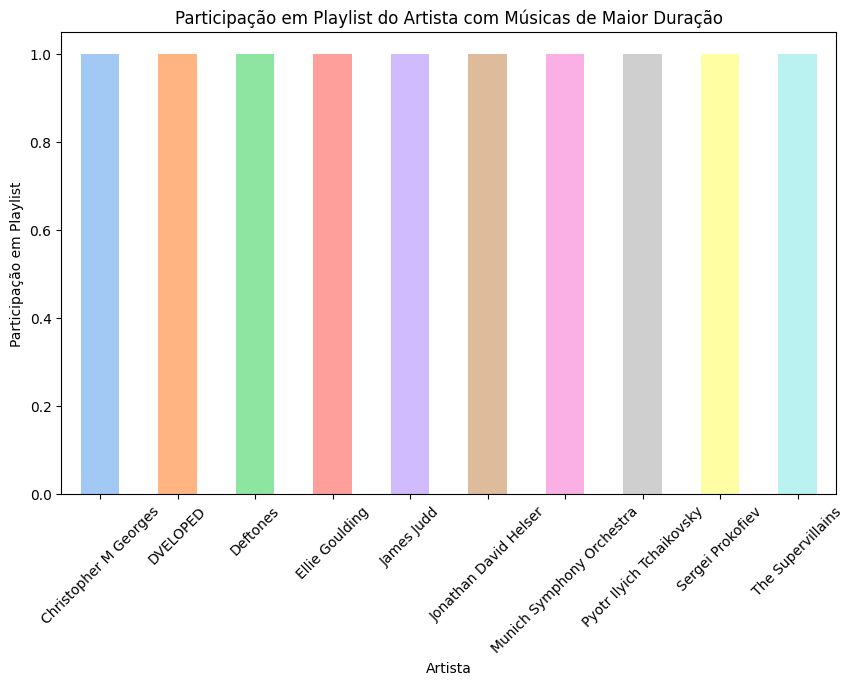

In [7]:
# Filtrar apenas as colunas relevantes
df_filtered = df[['artist_name', 'duration_ms', 'playlist_name']]

# Ordenar o DataFrame pela duração em ordem decrescente
df_sorted = df_filtered.sort_values(by='duration_ms', ascending=False)

# Selecionar apenas as músicas de maior duração (pode ser um número específico, como 10)
top_songs = df_sorted.head(10)

# Agrupar por artista e contar a participação nas playlists
artist_playlist_counts = top_songs.groupby('artist_name')['playlist_name'].count()

# Paleta de cores para testar seaborn
colors = sns.color_palette('pastel', len(top_songs))

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
artist_playlist_counts.plot(kind = 'bar', color = colors)
plt.xlabel('Artista')
plt.ylabel('Participação em Playlist')
plt.title('Participação em Playlist do Artista com Músicas de Maior Duração')
plt.xticks(rotation=45)
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12724\589981585.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_songs['duration_min'] = top_songs['duration_ms'] / 60000


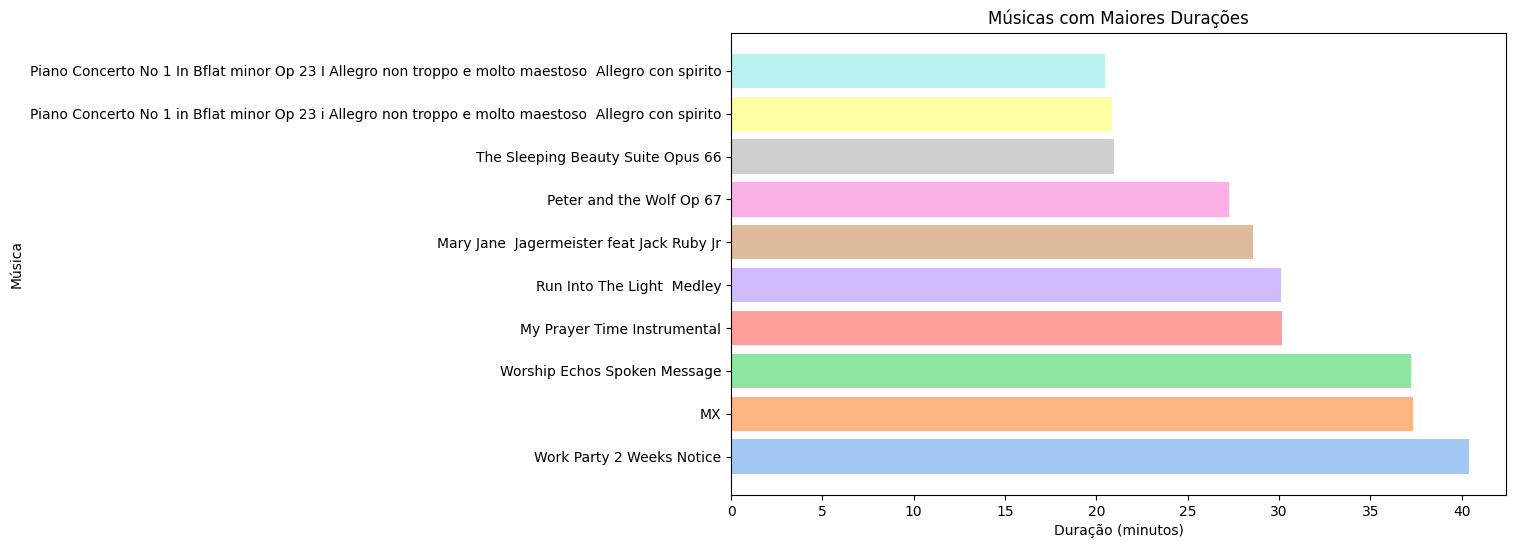

In [8]:
# Ordenar o DataFrame pela duração em ordem decrescente
df_sorted = df.sort_values(by='duration_ms', ascending=False)

# Selecionar as músicas com maiores durações (pode ser um número específico, como 10)
top_songs = df_sorted.head(10)

# Converter a duração das músicas de milissegundos para minutos
top_songs['duration_min'] = top_songs['duration_ms'] / 60000

# Criar uma lista com os nomes das músicas e suas respectivas durações em minutos
songs = top_songs['track_name']
durations = top_songs['duration_min']

# Paleta de cores para testar seaborn
colors = sns.color_palette('pastel', len(top_songs))

# Plotar o gráfico de barras horizontais com as cores das barras
plt.figure(figsize=(10, 6))
plt.barh(songs, durations, color=colors)
plt.xlabel('Duração (minutos)')
plt.ylabel('Música')
plt.title('Músicas com Maiores Durações')
plt.show()
